## IMPORT LIBRARES AND PACKAGES

In [1]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, cv2
import dlib

from PIL import Image
from scipy import stats

from keras.utils import to_categorical

## [1] DATA PREPARATION

Setup data directory

In [2]:
IMAGE_DIRECTORY = "./data-1/cohn-kanade-images/"
DATA_LABEL_DIRECTORY = "./data-1/data_labels.csv"

#### Load Label Dataset

In [3]:
df = pd.read_csv(DATA_LABEL_DIRECTORY)

Explore head

In [4]:
df.head(5)

,subject,sequence,image_index,filepath,file_prefix,AU17,AU1,AU2,AU25,AU27,...,AU7,AU23,AU24,AU6,AU12,AU15,AU14,AU11,AU26,high_level_emotion
0,S005,1,11,./cohn-kanade-images/S005/001/S005_001_0000001...,S005_001_00000011,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
1,S010,1,14,./cohn-kanade-images/S010/001/S010_001_0000001...,S010_001_00000014,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,negative
2,S010,2,14,./cohn-kanade-images/S010/002/S010_002_0000001...,S010_002_00000014,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,surprise
3,S010,3,18,./cohn-kanade-images/S010/003/S010_003_0000001...,S010_003_00000018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
4,S010,4,19,./cohn-kanade-images/S010/004/S010_004_0000001...,S010_004_00000019,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,negative


Explore Tail

In [5]:
df.tail(5)

,subject,sequence,image_index,filepath,file_prefix,AU17,AU1,AU2,AU25,AU27,...,AU7,AU23,AU24,AU6,AU12,AU15,AU14,AU11,AU26,high_level_emotion
555,S506,4,38,./cohn-kanade-images/S506/004/S506_004_0000003...,S506_004_00000038,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,negative
556,S506,6,42,./cohn-kanade-images/S506/006/S506_006_0000004...,S506_006_00000042,1,1,1,0,0,...,0,0,0,0,0,1,0,0,1,negative
557,S895,2,7,./cohn-kanade-images/S895/002/S895_002_0000000...,S895_002_00000007,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,negative
558,S999,1,18,./cohn-kanade-images/S999/001/S999_001_0000001...,S999_001_00000018,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,negative
559,S999,3,55,./cohn-kanade-images/S999/003/S999_003_0000005...,S999_003_00000055,0,1,1,1,0,...,0,0,0,0,0,0,1,0,0,negative


#### 1.1 DATA INTEGRITY CHECKING

Check Duplicate

In [6]:
print('Number of duplicated rows:', df.duplicated().sum())

Number of duplicated rows: 0


Check Nan Value

In [7]:
print('Number of Nan value rows:\n', df.isnull().sum())

Number of Nan value rows:
 subject               0
sequence              0
image_index           0
filepath              0
file_prefix           0
AU17                  0
AU1                   0
AU2                   0
AU25                  0
AU27                  0
AU4                   0
AU7                   0
AU23                  0
AU24                  0
AU6                   0
AU12                  0
AU15                  0
AU14                  0
AU11                  0
AU26                  0
high_level_emotion    0
dtype: int64


Check Data Overall 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   subject             560 non-null    object
 1   sequence            560 non-null    int64 
 2   image_index         560 non-null    int64 
 3   filepath            560 non-null    object
 4   file_prefix         560 non-null    object
 5   AU17                560 non-null    int64 
 6   AU1                 560 non-null    int64 
 7   AU2                 560 non-null    int64 
 8   AU25                560 non-null    int64 
 9   AU27                560 non-null    int64 
 10  AU4                 560 non-null    int64 
 11  AU7                 560 non-null    int64 
 12  AU23                560 non-null    int64 
 13  AU24                560 non-null    int64 
 14  AU6                 560 non-null    int64 
 15  AU12                560 non-null    int64 
 16  AU15                560 no

## [2] EXPLORATORY DATA ANALYSIS

2.1 Check Label Count

C:\Users\Pham Quoc Bao\AppData\Local\Temp\ipykernel_12848\2055809110.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=target_value_counts.index, y=target_value_counts.values, palette='hls',)


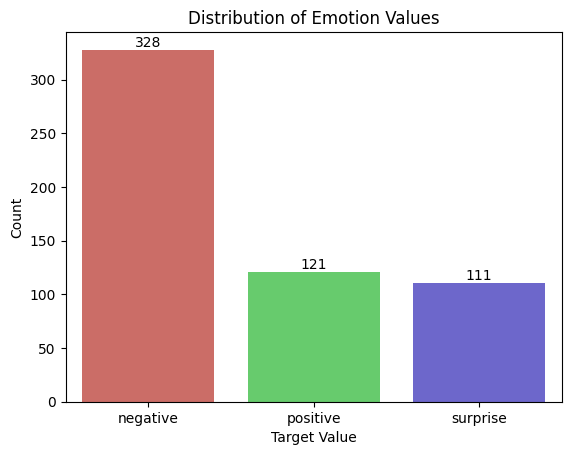

In [9]:
# Get the counts of each target value
target_value_counts = df['high_level_emotion'].value_counts()

# Create a bar plot
ax = sns.barplot(x=target_value_counts.index, y=target_value_counts.values, palette='hls',)

# Show the number of observations inside each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.xlabel('Target Value')
plt.ylabel('Count')
plt.title('Distribution of Emotion Values')
plt.show()

**Observation**

It seems there are unbalanced count of negative comparing to other label

2.2 Visual Inspectation

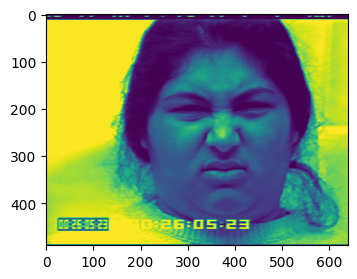

In [10]:
# For simplicity, let's just take the first subject and its first sequence
subject_sequence = df[(df['subject'] == 'S005') & (df['sequence'] == 1)]
sequence_files = subject_sequence['filepath'].tolist()

# Ensure that axes is always iterable
fig, axes = plt.subplots(1, len(sequence_files), figsize=(15, 3))
if len(sequence_files) == 1:
    axes = [axes]  # Make it a list so it's iterable

for ax, file in zip(axes, sequence_files):
    # Correct the file path by stripping the redundant part
    corrected_file_path = file.replace('./cohn-kanade-images/', '')
    img_path = os.path.join(IMAGE_DIRECTORY, corrected_file_path)
    try:
        img = Image.open(img_path)
        ax.imshow(img)
        ax.axis('on')
    except IOError:
        print(f"Error opening image: {img_path}")

plt.show()

In [11]:
# Define an empty list to hold image sizes
image_sizes = []

# Define lists to hold mean and standard deviation of pixel values
mean_pixel_values = []
std_pixel_values = []

# Define a list to hold paths of corrupt images
corrupt_images = []

img_path_list = []
# Loop through the file paths in your DataFrame
for file_path in df['filepath']:
    corrected_file_path = file_path.replace('./cohn-kanade-images/', '')
    img_path = os.path.join(IMAGE_DIRECTORY, corrected_file_path)
    img_path_list.append(img_path)
    try:
        # Open the image and convert it to RGB (in case some are grayscale)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Check if the image is read correctly
        if img is not None:
            # Append the image size
            image_sizes.append(img.shape)
            
            # Calculate and store the mean and standard deviation of pixel values
            mean_pixel_values.append(np.mean(img))
            std_pixel_values.append(np.std(img))
        else:
            # If img is None, the image is corrupt
            corrupt_images.append(img_path)
            
    except Exception as e:
        # If an exception is raised, the image is likely corrupt
        corrupt_images.append(img_path)

In [12]:
# Now let's analyze the image sizes
image_sizes = np.array(image_sizes)
unique_sizes = np.unique(image_sizes, axis=0)

# We can print out or plot the unique sizes to decide on a common size
print(f"Unique image sizes: {unique_sizes}")

Unique image sizes: [[480 640   3]
 [480 720   3]
 [490 640   3]]


In [13]:
# Calculate the overall mean and standard deviation for the pixel values
overall_mean = np.mean(mean_pixel_values)
overall_std = np.std(std_pixel_values)

print(f"Overall mean pixel value: {overall_mean}")
print(f"Overall standard deviation of pixel values: {overall_std}")

# Print out corrupt images, if any
if corrupt_images:
    print("Found corrupt images:")
    for corrupt_img in corrupt_images:
        print(corrupt_img)
else:
    print("No corrupt images found.")

Overall mean pixel value: 99.93890188972647
Overall standard deviation of pixel values: 9.063075756547514
No corrupt images found.


In [14]:
# Background Consistency Check
background_modes = []

for img_path in img_path_list:
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Grayscale simplifies the analysis
    border_pixels = np.concatenate([img[0, :], img[-1, :], img[:, 0], img[:, -1]])  # Extract border pixels
    mode = stats.mode(border_pixels)  # Find the mode of the border pixels
    background_modes.append(mode)

C:\Users\Pham Quoc Bao\AppData\Local\Temp\ipykernel_12848\3067096416.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(border_pixels)  # Find the mode of the border pixels


Mean mode value: 11.378571428571428
Standard deviation of mode values: 47.69470887951871


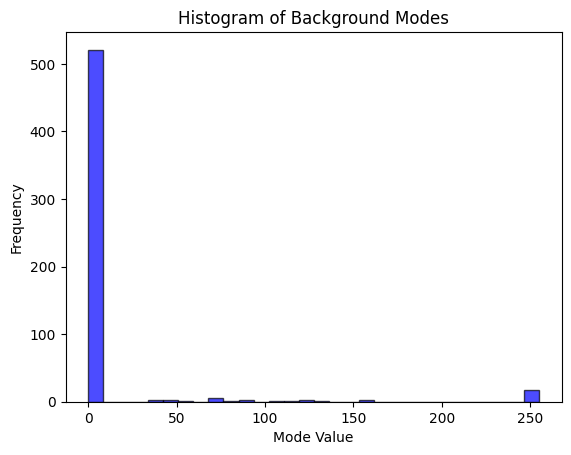

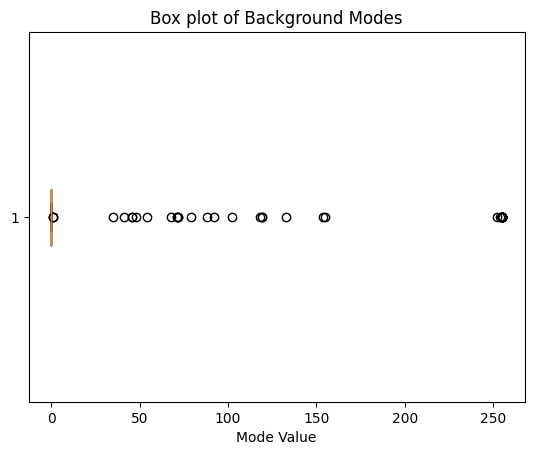

In [15]:

# Extract the mode values and counts
mode_values = [mode.mode[0] for mode in background_modes]
mode_counts = [mode.count[0] for mode in background_modes]

# Calculate basic statistics
mean_mode = np.mean(mode_values)
std_dev_mode = np.std(mode_values)

print(f"Mean mode value: {mean_mode}")
print(f"Standard deviation of mode values: {std_dev_mode}")

# Visualize the distribution of mode values
plt.hist(mode_values, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Background Modes')
plt.xlabel('Mode Value')
plt.ylabel('Frequency')
plt.show()

# Box plot for detecting outliers
plt.boxplot(mode_values, vert=False)
plt.title('Box plot of Background Modes')
plt.xlabel('Mode Value')
plt.show()

## [3] SETUP AND EXTRACT ESSENTIAL DATA 

#### 3.1 Load and Prepare Image Dataset

In [16]:
# Load the pre-trained facial landmark predictor
predictor_path = "./dlib-models-master/dlib-models-master/shape_predictor_68_face_landmarks.dat/shape_predictor_68_face_landmarks.dat"  
face_detector = dlib.get_frontal_face_detector()
landmark_predictor = dlib.shape_predictor(predictor_path)

In [17]:
def get_facial_landmarks(image):
    faces = face_detector(image, 1)
    for k, d in enumerate(faces):
        # Get the landmarks/parts for the face in box d.
        shape = landmark_predictor(image, d)
        landmarks = [(point.x, point.y) for point in shape.parts()]
        return landmarks  # For simplicity, returning landmarks of the first face detected
    return None

In [18]:
def crop_for_au_analysis(image, landmarks):
    # Define the indices for landmarks around the eyes
    # These indices are based on the standard 68 facial landmarks
    eye_indices = list(range(36, 42))  # Adjust these indices based on your requirement
    
    # Get coordinates for the bounding box around the eyes
    x1 = min(landmarks[i][0] for i in eye_indices)
    y1 = min(landmarks[i][1] for i in eye_indices)
    x2 = max(landmarks[i][0] for i in eye_indices)
    y2 = max(landmarks[i][1] for i in eye_indices)

    # Crop and return the image
    cropped_image = image[y1:y2, x1:x2]
    return cropped_image


In [19]:
# Initialize an empty list to store processed images
img_data_list = []

# Prepare two sets of inputs
full_face_images = []
au_specific_images = []

# Get a list of image file paths from the 'filepath' column in the DataFrame
img_file_list = df['filepath'].tolist()

# Iterate through each image file path
for img in img_file_list:
    img_path = os.path.join(IMAGE_DIRECTORY, corrected_file_path)
    input_img = cv2.imread(img_path)
    grayscaled_image = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

    # Detect landmarks
    landmarks = get_facial_landmarks(grayscaled_image)

    # Full-face processing
    full_face_resized = cv2.resize(grayscaled_image, (64, 64)) / 255.0
    full_face_images.append(np.expand_dims(full_face_resized, axis=-1))

    if landmarks:
        # AU-specific processing
        cropped_for_au = crop_for_au_analysis(grayscaled_image, landmarks)
        cropped_resized = cv2.resize(cropped_for_au, (64, 64)) / 255.0
        au_specific_images.append(np.expand_dims(cropped_resized, axis=-1))
    else:
        # Handle cases where landmarks are not detected
        # You might choose to use the full-face image or a blank image
        au_specific_images.append(np.zeros((48, 48, 1)))

# Convert lists to NumPy arrays
full_face_data = np.array(full_face_images).astype('float32')
au_specific_data = np.array(au_specific_images).astype('float32')

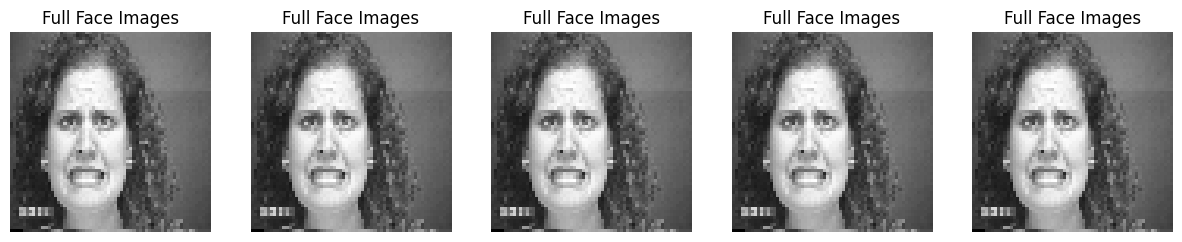

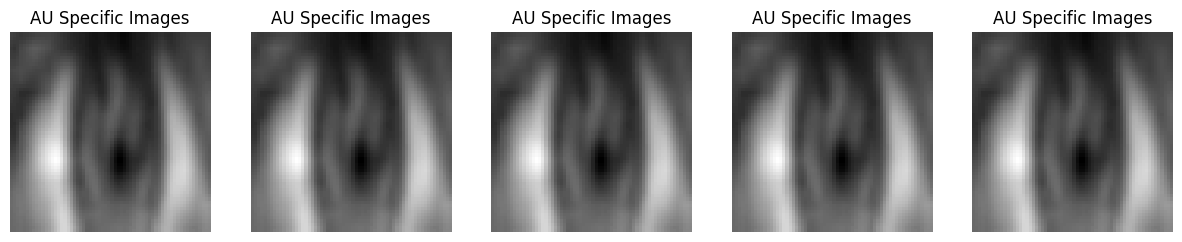

In [23]:
def display_images(images, title, num_images=5):
    # Set the number of images to display
    num_images = min(num_images, len(images))

    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape(64, 64), cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.show()

# Display full face images
display_images(full_face_data, title="Full Face Images")

# Display AU-specific images
display_images(au_specific_data, title="AU Specific Images")

In [20]:
full_face_data

array([[[[0.2627451 ],
         [0.29803923],
         [0.30980393],
         ...,
         [0.36862746],
         [0.34901962],
         [0.34509805]],

        [[0.2784314 ],
         [0.2901961 ],
         [0.32156864],
         ...,
         [0.3529412 ],
         [0.34509805],
         [0.33333334]],

        [[0.26666668],
         [0.29411766],
         [0.3137255 ],
         ...,
         [0.3647059 ],
         [0.34509805],
         [0.34117648]],

        ...,

        [[0.18431373],
         [0.19215687],
         [0.18039216],
         ...,
         [0.2627451 ],
         [0.26666668],
         [0.2509804 ]],

        [[0.20784314],
         [0.21960784],
         [0.23529412],
         ...,
         [0.25882354],
         [0.2627451 ],
         [0.23921569]],

        [[0.02745098],
         [0.02745098],
         [0.01960784],
         ...,
         [0.29803923],
         [0.29803923],
         [0.2784314 ]]],


       [[[0.2627451 ],
         [0.29803923],
         [0.30

In [21]:
au_specific_data

array([[[[0.3137255 ],
         [0.3019608 ],
         [0.28627452],
         ...,
         [0.3019608 ],
         [0.3019608 ],
         [0.3019608 ]],

        [[0.3137255 ],
         [0.29803923],
         [0.28627452],
         ...,
         [0.3019608 ],
         [0.3019608 ],
         [0.3019608 ]],

        [[0.3019608 ],
         [0.2901961 ],
         [0.3019608 ],
         ...,
         [0.3137255 ],
         [0.30980393],
         [0.30588236]],

        ...,

        [[0.4117647 ],
         [0.42352942],
         [0.43529412],
         ...,
         [0.4862745 ],
         [0.5058824 ],
         [0.5019608 ]],

        [[0.4117647 ],
         [0.41960785],
         [0.42745098],
         ...,
         [0.4745098 ],
         [0.49411765],
         [0.49019608]],

        [[0.4117647 ],
         [0.41960785],
         [0.42745098],
         ...,
         [0.47058824],
         [0.49411765],
         [0.49019608]]],


       [[[0.3137255 ],
         [0.3019608 ],
         [0.28

#### 3.2 Load and Prepare Label

In [22]:
# Define mapping conversion
target_mapping = {'negative': 0, 'positive': 1, 'surprise': 2}
df['high_level_emotion_num'] = df['high_level_emotion'].map(target_mapping)
labels = df['high_level_emotion_num'].to_list()
num_classes = 3
emotions_label = to_categorical(labels, num_classes=num_classes)

#### 3.3 Load and Prepare FACS CODE

In [23]:
facs_code_list = []
facs_code_df = df[df.columns[5:20]]
for i in range(df.shape[0]):
    facs_code_row = df.iloc[i, 5:20].tolist()
    facs_code_list.append(facs_code_row)
facs_list = np.array(facs_code_list)
facs_code_df

,AU17,AU1,AU2,AU25,AU27,AU4,AU7,AU23,AU24,AU6,AU12,AU15,AU14,AU11,AU26
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0
556,1,1,1,0,0,1,0,0,0,0,0,1,0,0,1
557,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
558,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0


## [4] TRAIN TEST SPLIT

In [24]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

MIGHT RESAMPLE

SPLIT TRAIN, VAL, TEST SET

In [25]:
# Split data into training, validation, and test sets
# Split data into training, validation, and test sets for both full-face and AU-specific images
X_train_full, X_temp_full, X_train_au, X_temp_au, y_train_facs, y_temp_facs, y_train_emotion, y_temp_emotion = train_test_split(full_face_data, au_specific_data, facs_list, emotions_label, test_size=0.3)

X_val_full, X_test_full, X_val_au, X_test_au, y_val_facs, y_test_facs, y_val_emotion, y_test_emotion = train_test_split(X_temp_full, X_temp_au, y_temp_facs, y_temp_emotion, test_size=0.5)

In [26]:
# TRAIN (70% of the dataset)
print("Train")
print("Full Face Images:", len(X_train_full), "AU Specific Images:", len(X_train_au))
print("FACS Labels:", len(y_train_facs), "Emotion Labels:", len(y_train_emotion), "\n")

# VAL (15% of the dataset)
print("Validation")
print("Full Face Images:", len(X_val_full), "AU Specific Images:", len(X_val_au))
print("FACS Labels:", len(y_val_facs), "Emotion Labels:", len(y_val_emotion), "\n")

# TEST (15% of the dataset)
print("Test")
print("Full Face Images:", len(X_test_full), "AU Specific Images:", len(X_test_au))
print("FACS Labels:", len(y_test_facs), "Emotion Labels:", len(y_test_emotion))


Train
Full Face Images: 392 AU Specific Images: 392
FACS Labels: 392 Emotion Labels: 392 

Validation
Full Face Images: 84 AU Specific Images: 84
FACS Labels: 84 Emotion Labels: 84 

Test
Full Face Images: 84 AU Specific Images: 84
FACS Labels: 84 Emotion Labels: 84


DATA AUGMENTATION

In [27]:
# Initialize the ImageDataGenerator with augmentation parameters
data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Custom generator
def custom_generator(X_train, y_facs_code, y_emotion_label, batch_size=32):
    gen = data_gen.flow(X_train, batch_size=batch_size, shuffle=False)
    while True:
        X_batch = next(gen)
        idx = (gen.batch_index - 1) * batch_size
        idx = idx if idx < X_train.shape[0] else X_train.shape[0] - batch_size
        y_batch_facs = y_facs_code[idx: idx + batch_size]
        y_batch_emotion = y_emotion_label[idx: idx + batch_size]
        yield X_batch, {'facs_output': y_batch_facs, 'emotion_output': y_batch_emotion}

train_generator = custom_generator(X_train_full, y_train_facs, y_train_emotion)

## [5] GET BASELINE MODEL

In [28]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.utils import class_weight

5.1 Design Model Structure

In [29]:
# input_layer = Input(shape=(48, 48, 1)) # INPUT WILL BE IMAGE WITH DESIGNED DIMENSIONS
# # Example CNN layers
# x = Conv2D(32, (3, 3), activation='relu')(input_layer)
# # x = BatchNormalization()(x)  # Adding batch normalization
# x = MaxPooling2D((2, 2))(x)
# # x = Dropout(0.5)(x)  # Adding dropout
# x = Flatten()(x)

# # FACS codes output
# facs_output = Dense(15, activation='sigmoid', name='facs_output')(x) # 15 FACS codes

# # Emotion label output
# emotion_output = Dense(3, activation='softmax', name='emotion_output')(x) # 3 emotion labels

# # Create the model
# model = Model(inputs=input_layer, outputs=[facs_output, emotion_output])

# model.compile(optimizer='adam', 
#               loss={'facs_output': 'binary_crossentropy', 'emotion_output': 'categorical_crossentropy'}, 
#               metrics=['accuracy'])

In [30]:
# Define two input layers
input_layer_full_face = Input(shape=(48, 48, 1), name='full_face_input')
input_layer_au_specific = Input(shape=(48, 48, 1), name='au_specific_input')

# Shared Convolutional Layers for Full-Face
x_full = Conv2D(32, (3, 3), activation='relu')(input_layer_full_face)
x_full = Conv2D(64, (3, 3), activation='relu')(x_full)
x_full = MaxPooling2D((2, 2))(x_full)
x_full = Conv2D(128, (3, 3), activation='relu')(x_full)
x_full = Conv2D(256, (3, 3), activation='relu')(x_full)  # New Conv layer
x_full = MaxPooling2D((2, 2))(x_full)
# x_full = Conv2D(512, (3, 3), activation='relu')(x_full)  # New Conv layer
# x_full = MaxPooling2D((2, 2))(x_full)
x_full = BatchNormalization()(x_full)
x_full = Dropout(0.5)(x_full)
x_full = Flatten()(x_full)

# Shared Convolutional Layers for AU-Specific
x_au = Conv2D(32, (3, 3), activation='relu')(input_layer_au_specific)
x_au = Conv2D(64, (3, 3), activation='relu')(x_au)
x_au = MaxPooling2D((2, 2))(x_au)
x_au = Conv2D(128, (3, 3), activation='relu')(x_au)
x_au = Conv2D(256, (3, 3), activation='relu')(x_au)  # New Conv layer
x_au = MaxPooling2D((2, 2))(x_au)
# x_au = Conv2D(512, (3, 3), activation='relu')(x_au)  # New Conv layer
# x_au = MaxPooling2D((2, 2))(x_au)
x_au = BatchNormalization()(x_au)
x_au = Dropout(0.5)(x_au)
x_au = Flatten()(x_au)


# FACS Branch (AU-Specific)
facs_branch = Dense(128, activation='relu')(x_au)
facs_branch = Dropout(0.5)(facs_branch)
facs_output = Dense(15, activation='sigmoid', name='facs_output')(facs_branch)

# Emotion Branch (Full-Face)
emotion_branch = Dense(64, activation='relu')(x_full)
emotion_branch = Dropout(0.5)(emotion_branch)
emotion_output = Dense(3, activation='softmax', name='emotion_output')(emotion_branch)

# Create the model
model = Model(inputs=[input_layer_full_face, input_layer_au_specific], outputs=[facs_output, emotion_output])

model.compile(optimizer='adam', 
              loss={'facs_output': 'binary_crossentropy', 'emotion_output': 'categorical_crossentropy'}, 
              metrics=['accuracy'])

In [31]:
from tensorflow.keras.utils import plot_model
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [32]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 au_specific_input (InputLa  [(None, 48, 48, 1)]          0         []                            
 yer)                                                                                             
                                                                                                  
 full_face_input (InputLaye  [(None, 48, 48, 1)]          0         []                            
 r)                                                                                               
                                                                                                  
 conv2d_4 (Conv2D)           (None, 46, 46, 32)           320       ['au_specific_input[0][0]']   
                                                                                              

In [33]:
def calculate_sample_weights(y):
    # Calculate the weights for each class
    n_samples = y.shape[0]
    n_classes = y.shape[1]
    class_weights = np.zeros_like(y, dtype=float)  # Corrected dtype here
    
    for i in range(n_classes):
        class_counts = np.bincount(y[:, i])
        # The weight for class '1' will be inverse to its frequency
        class_weights[y[:, i] == 1, i] = n_samples / (class_counts[1] * n_classes)
        # The weight for class '0' will be inverse to its frequency
        class_weights[y[:, i] == 0, i] = n_samples / (class_counts[0] * n_classes)
    
    # The sample weight for a given sample is the max across all of its class weights
    sample_weights = np.max(class_weights, axis=1)
    return sample_weights


In [34]:
# Calculate sample weights for FACS output
sample_weights_facs = calculate_sample_weights(y_train_facs)

# Callback for learning rate reduction
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)


In [35]:
# Assuming 'model' is already defined as per your previous code

# Change in training configuration
epochs = 128
batch_size = 32

# Training the model with the updated configuration
# history = model.fit(X_train, {'facs_output': y_train_facs, 'emotion_output': y_train_emotion}, 
#                     validation_data=(X_val, {'facs_output': y_val_facs, 'emotion_output': y_val_emotion}), 
#                     epochs=epochs, batch_size=batch_size)


# history = model.fit(train_generator, 
#                     validation_data=(X_val, {'facs_output': y_val_facs, 'emotion_output': y_val_emotion}), 
#                     epochs=100, batch_size=32)

# Training the model with the updated configuration
history = model.fit(
    [X_train_full, X_train_au], 
    {'facs_output': y_train_facs, 'emotion_output': y_train_emotion},
    validation_data=([X_val_full, X_val_au], {'facs_output': y_val_facs, 'emotion_output': y_val_emotion}),
    epochs=epochs,
    batch_size=batch_size
    # sample_weight={'facs_output': sample_weights_facs}  # Apply sample weights for FACS output
)


Epoch 1/128


13/13 [==============================] - 10s 569ms/step - loss: 2.2491 - facs_output_loss: 0.5465 - emotion_output_loss: 1.7026 - facs_output_accuracy: 0.2092 - emotion_output_accuracy: 0.5000 - val_loss: 1.7867 - val_facs_output_loss: 0.6758 - val_emotion_output_loss: 1.1109 - val_facs_output_accuracy: 0.2619 - val_emotion_output_accuracy: 0.1905
Epoch 2/128
13/13 [==============================] - 7s 533ms/step - loss: 1.5271 - facs_output_loss: 0.5100 - emotion_output_loss: 1.0171 - facs_output_accuracy: 0.1964 - emotion_output_accuracy: 0.5357 - val_loss: 1.7356 - val_facs_output_loss: 0.6599 - val_emotion_output_loss: 1.0757 - val_facs_output_accuracy: 0.2619 - val_emotion_output_accuracy: 0.5595
Epoch 3/128
13/13 [==============================] - 7s 532ms/step - loss: 1.5053 - facs_output_loss: 0.5036 - emotion_output_loss: 1.0017 - facs_output_accuracy: 0.2526 - emotion_output_accuracy: 0.5918 - val_loss: 1.7502 - val_facs_output_loss: 0.6595 - val_emotion_output_loss: 1.0908 -

In [36]:
# Evaluate the model on the test set
evaluation = model.evaluate(
    [X_test_full, X_test_au],  # Provide both full-face and AU-specific test images
    {'facs_output': y_test_facs, 'emotion_output': y_test_emotion}
)

# Unpacking the evaluation results
# The indices for unpacking should match the order of outputs defined in the model
total_loss = evaluation[0]  # Total loss
loss_facs = evaluation[1]  # Loss for FACS output
loss_emotion = evaluation[2]  # Loss for emotion output
accuracy_facs = evaluation[3]  # Accuracy for FACS output
accuracy_emotion = evaluation[4]  # Accuracy for emotion output

# Print evaluation results
print(f"Total Loss: {total_loss}")
print(f"Loss for FACS Output: {loss_facs}")
print(f"Loss for Emotion Output: {loss_emotion}")
print(f"Accuracy for FACS Output: {accuracy_facs}")
print(f"Accuracy for Emotion Output: {accuracy_emotion}")


3/3 [==============================] - 0s 113ms/step - loss: 1.4497 - facs_output_loss: 0.4779 - emotion_output_loss: 0.9718 - facs_output_accuracy: 0.3571 - emotion_output_accuracy: 0.5833
Total Loss: 1.4497286081314087
Loss for FACS Output: 0.4779127240180969
Loss for Emotion Output: 0.9718159437179565
Accuracy for FACS Output: 0.3571428656578064
Accuracy for Emotion Output: 0.5833333134651184


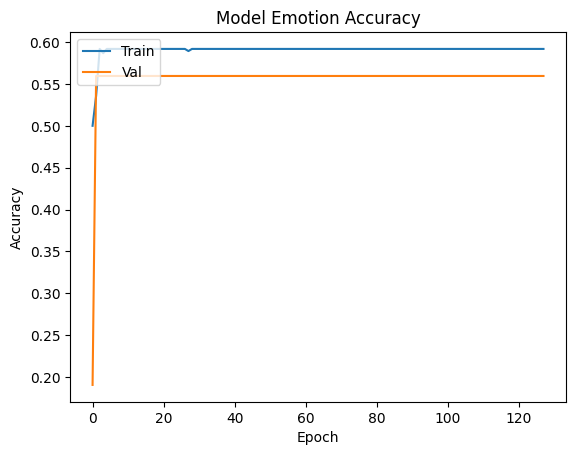

In [37]:
# Plotting the training and validation accuracy
plt.plot(history.history['emotion_output_accuracy'])
plt.plot(history.history['val_emotion_output_accuracy'])
plt.title('Model Emotion Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

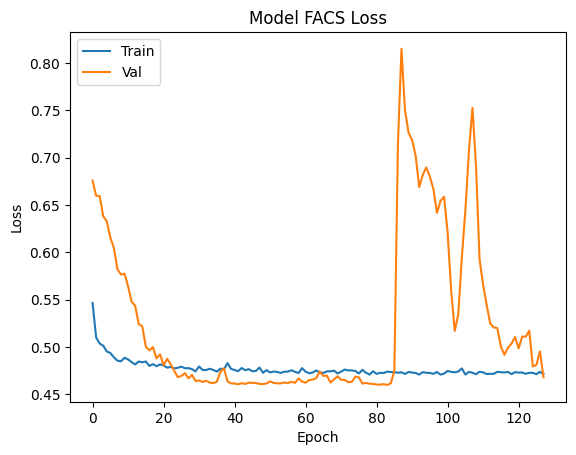

In [38]:
# Plotting the training and validation loss
plt.plot(history.history['facs_output_loss'])
plt.plot(history.history['val_facs_output_loss'])
plt.title('Model FACS Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [39]:
predictions = model.predict(X_test_full)

ValueError: in user code:

    File "c:\Users\Pham Quoc Bao\anaconda3\envs\py38\lib\site-packages\keras\src\engine\training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\Pham Quoc Bao\anaconda3\envs\py38\lib\site-packages\keras\src\engine\training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Pham Quoc Bao\anaconda3\envs\py38\lib\site-packages\keras\src\engine\training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\Pham Quoc Bao\anaconda3\envs\py38\lib\site-packages\keras\src\engine\training.py", line 2283, in predict_step
        return self(x, training=False)
    File "c:\Users\Pham Quoc Bao\anaconda3\envs\py38\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Pham Quoc Bao\anaconda3\envs\py38\lib\site-packages\keras\src\engine\input_spec.py", line 219, in assert_input_compatibility
        raise ValueError(

    ValueError: Layer "model" expects 2 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 48, 48, 1) dtype=float32>]


In [ ]:
facs_predictions, emotion_predictions = predictions
# Processing FACS predictions: Convert probabilities to binary values
facs_pred_binary = (facs_predictions > 0.5).astype(int)

# Processing Emotion predictions: Convert probabilities to class labels
emotion_pred_labels = np.argmax(emotion_predictions, axis=1)

In [ ]:
facs_pred_binary

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
emotion_pred_labels

array([0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 2,
       1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

## [6] HYPER TUNING

In [ ]:
names = ['negative','positive','surprise']

def getLabel(id):
    return ['negative','positive','surprise'][id]

In [ ]:
# Tune note
    # Optimizer (Learning Rate, etc...)
    # Image Augumentation
    # Adjust Epoch
